<a href="https://colab.research.google.com/github/Ganesh-1902/House-Price-Prediction-Dataset/blob/main/House_Price_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import files
uploaded = files.upload()

Saving House Price Prediction Dataset.csv to House Price Prediction Dataset (1).csv


In [31]:
import pandas as pd

df = pd.read_csv("House Price Prediction Dataset.csv")

In [32]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [33]:
df.info

<bound method DataFrame.info of         Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0        No  149919  
1        No  424998  
2        No  266746  
3       Yes  244020  
4       Yes  636056  
...     ...     ...  
1995     No  295620  
1996    Yes  580929  
1997     No  476925  
1998    Yes  161119  
1999     No  482525  

[2000 rows x 10 columns]>

In [34]:
df.shape

(2000, 10)

In [35]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [36]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [37]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [38]:
df = df.drop(columns=['Id'])

In [39]:
x = df.drop(columns=['Price'])
y = df['Price']

In [40]:
# train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [41]:
x_train.shape

(1600, 8)

In [42]:
x_test.shape

(400, 8)

In [43]:
x_train.dtypes

,0
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object


In [44]:
# linear models and regularization are sensitive to features
# scaler to before regression we encode categoricals
# and scale numericals

In [45]:
categorical_cols =['Location','Condition','Garage']

numerical_cols = x_train.drop(columns=categorical_cols).columns

In [46]:
categorical_cols, numerical_cols

(['Location', 'Condition', 'Garage'],
 Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt'], dtype='object'))

In [47]:
# we will use OneHotEncoder cz regression needs numbers
# it increase features = set up regularization needs

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# columTransformer is to apply differnt preprocessing steps to
# differnt columns in one go Bz
# numerical columns needs scalling, categorical columns needs encoding,
# so we should not treat all the columns same

In [48]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(),categorical_cols)
  ]
)

# transform =[]
# this is list of rules
# each rule follow this fethear_format(name,transform,columns)


In [49]:
x_train_processed=preprocessor.fit_transform(x_train)
x_test_processed=preprocessor.transform(x_test)

In [50]:
x_train_processed.shape

(1600, 15)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_processed,y_train)

LinearRegression()

In [52]:
x_train_processed.shape

(1600, 15)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_processed,y_train)

LinearRegression()

In [54]:
y_train_pred = lr.predict(x_train_processed)
y_test_pred = lr.predict(x_test_processed)

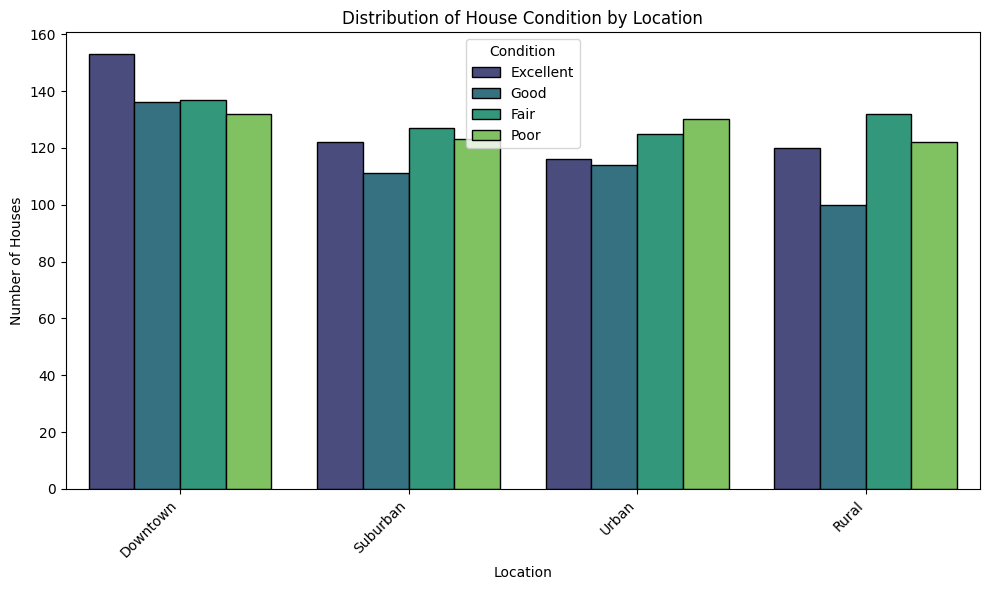

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', hue='Condition', palette='viridis',edgecolor='black')
plt.title('Distribution of House Condition by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3317782045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Price', data=df, palette='viridis')


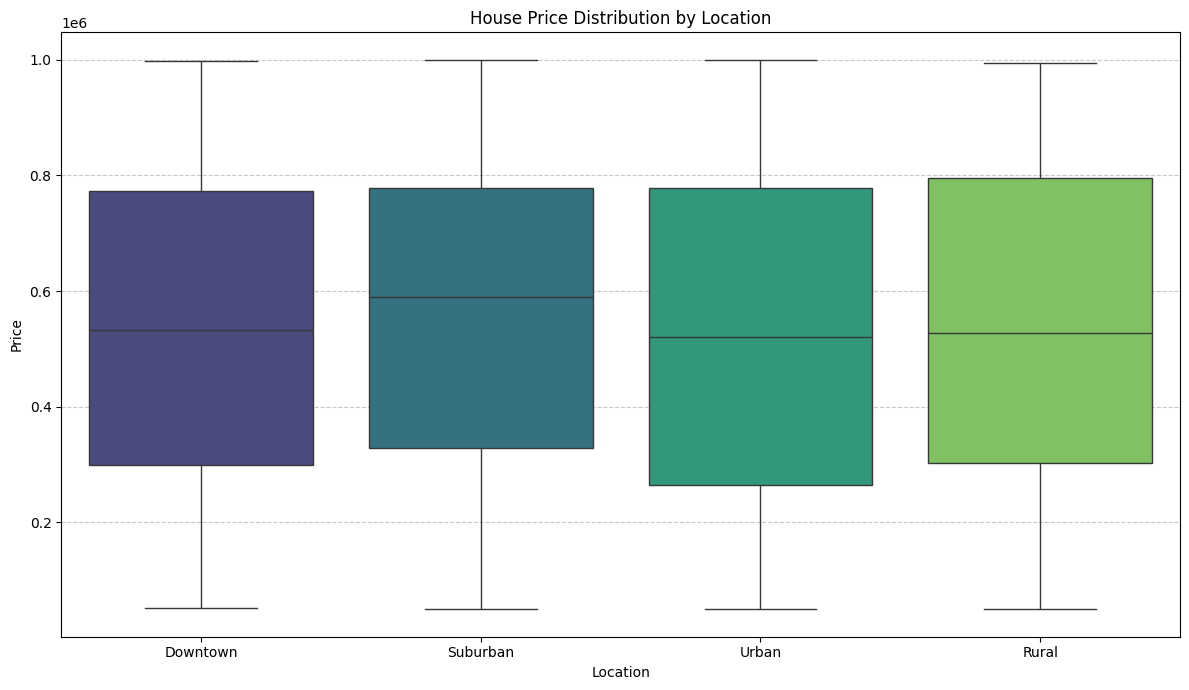

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='Location', y='Price', data=df, palette='viridis')
plt.title('House Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

# the reason for using mae, mse, rmse, r2 is that we never judge
# model by accuracy in LinearRegression
# here we used error based metrics


mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)

print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 243241.97758826384
MSE: 78321466146.0328
RMSE: 279859.72583784326
R2: -0.006717808430749761


In [58]:
train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)

print('Train R2:',train_r2)
print('Test R2:',test_r2)


Train R2: 0.009856184863687778
Test R2: -0.006717808430749761


In [59]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(x_train_processed, y_train)

y_train_pred_ridge = ridge.predict(x_train_processed)
y_test_pred_ridge = ridge.predict(x_test_processed)

In [60]:
from sklearn.metrics import r2_score

ridge_train_r2 = r2_score(y_train,y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test,y_test_pred_ridge)

ridge_train_r2, ridge_test_r2

(0.009856162014935554, -0.006713338161288718)

In [61]:
#lasso regression
# ridge reduces impact of usless fetures while lesso completly eliminites useless features

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1, max_iter = 1000)
lasso.fit(x_train_processed,y_train)

y_train_pred_lasso = lasso.predict(x_train_processed)
y_test_pred_lasso = lasso.predict(x_test_processed)

In [62]:
lasso_train_r2 = r2_score(y_train,y_train_pred_ridge)
lasso_test_r2 = r2_score(y_test,y_test_pred_ridge)


lasso_train_r2, lasso_test_r2

(0.009856162014935554, -0.006713338161288718)

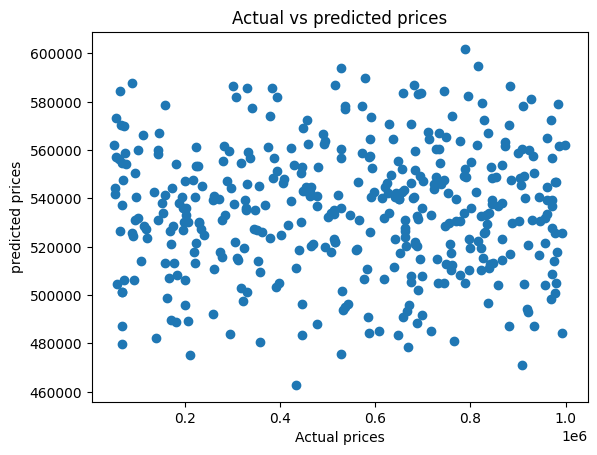

In [63]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual prices')
plt.ylabel('predicted prices')
plt.title('Actual vs predicted prices')
plt.show()